In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gathering Data

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

with requests.Session() as s:
    image_predictions = s.get(url)
    with open('image_predictions.tsv', 'wb') as f:
        f.write(image_predictions.content)

In [4]:
image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')

In [5]:
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

2356

In [24]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [25]:
len(fails_dict)

25

There are 25 missing tweets

In [ ]:
data = []
with open('file') as f:
    for line in f:
        data.append(json.loads(line))

In [7]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    for line in json_file:
        each_dictionary = json.loads(line)
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']

        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count',  
                                                           'retweeted_status', 'url'])

In [8]:
tweet_json

,tweet_id,favorite_count,retweet_count,retweeted_status,url
0,892420643555336193,35305,7455,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30558,5535,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,23001,3661,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,38602,7628,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36881,8224,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...
2326,666049248165822465,95,39,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,263,124,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,108,39,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,118,41,Original tweet,https://t.co/r7mOb2m0UI


# Assessmenting Data

We begin with checking data visually

In [9]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


It looks like that we have a lot of missing values in *in_reply_to_status_id*, *in_reply_to_user_id*,*retweeted_status_timestamp*, *retweeted_status_id* and *retweeted_status_user_id* columns

The *Source* column holds HTML tags

In [10]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### It's TRUE

There are few values in *in_reply_to_status_id*, *in_reply_to_user_id*,*retweeted_status_timestamp*, *retweeted_status_id* and *retweeted_status_user_id* columns

In [11]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Make sure that *doggo*, *floofer*, *pupper* and *puppo* are binary classified

In [12]:
twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
twitter_archive_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Let's check the duplicates

In [16]:
twitter_archive_enhanced['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

### Let's check the rating quality

In [17]:
twitter_archive_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Looks like there are a lot of extreme values

In [19]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


Lucky me! The only zero rating_denominator is the first row in the *df* above

Let's check

In [20]:
twitter_archive_enhanced['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

#### The both *rating_denominator* and *rating_numerator* are wrong

In [21]:
twitter_archive_enhanced['text'][516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

### When *rating_denominator* is 10 let's check the extremes *rating_numerator*

In [22]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 16][twitter_archive_enhanced['rating_denominator'] == 10]

<ipython-input-22-d3aa2f3bd91f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 16][twitter_archive_enhanced['rating_denominator'] == 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [23]:
print("2074: ",twitter_archive_enhanced['text'][2074])
print("1712: ",twitter_archive_enhanced['text'][1712])
print("979: ",twitter_archive_enhanced['text'][979])
print("763: ",twitter_archive_enhanced['text'][763])
print("695: ",twitter_archive_enhanced['text'][695])
print("340: ",twitter_archive_enhanced['text'][340])
print("290: ",twitter_archive_enhanced['text'][290])
print("189: ",twitter_archive_enhanced['text'][189])
print("188: ",twitter_archive_enhanced['text'][188])
print("55: ",twitter_archive_enhanced['text'][55])

2074:  After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
1712:  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
979:  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
763:  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
695:  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
340:  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
290:  @markhoppus 182/10
189:  @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
188:  @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
55: 

#### The rows 1712, 763, 695 and 340 have a wrong rating_numerator

## image_predictions data

In [24]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
image_predictions[image_predictions['p1_dog'] == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  543 non-null    int64  
 1   jpg_url   543 non-null    object 
 2   img_num   543 non-null    int64  
 3   p1        543 non-null    object 
 4   p1_conf   543 non-null    float64
 5   p1_dog    543 non-null    bool   
 6   p2        543 non-null    object 
 7   p2_conf   543 non-null    float64
 8   p2_dog    543 non-null    bool   
 9   p3        543 non-null    object 
 10  p3_conf   543 non-null    float64
 11  p3_dog    543 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 44.0+ KB


In [29]:
image_predictions[image_predictions['p2_dog'] == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  522 non-null    int64  
 1   jpg_url   522 non-null    object 
 2   img_num   522 non-null    int64  
 3   p1        522 non-null    object 
 4   p1_conf   522 non-null    float64
 5   p1_dog    522 non-null    bool   
 6   p2        522 non-null    object 
 7   p2_conf   522 non-null    float64
 8   p2_dog    522 non-null    bool   
 9   p3        522 non-null    object 
 10  p3_conf   522 non-null    float64
 11  p3_dog    522 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 42.3+ KB


In [30]:
image_predictions[image_predictions['p3_dog'] == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  576 non-null    int64  
 1   jpg_url   576 non-null    object 
 2   img_num   576 non-null    int64  
 3   p1        576 non-null    object 
 4   p1_conf   576 non-null    float64
 5   p1_dog    576 non-null    bool   
 6   p2        576 non-null    object 
 7   p2_conf   576 non-null    float64
 8   p2_dog    576 non-null    bool   
 9   p3        576 non-null    object 
 10  p3_conf   576 non-null    float64
 11  p3_dog    576 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 46.7+ KB


In [31]:
not_dogs = image_predictions[image_predictions['p1_dog'] == False][image_predictions['p2_dog'] == False][image_predictions['p3_dog'] == False]
not_dogs

<ipython-input-31-6ec23e070c8e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_dogs = image_predictions[image_predictions['p1_dog'] == False][image_predictions['p2_dog'] == False][image_predictions['p3_dog'] == False]
<ipython-input-31-6ec23e070c8e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_dogs = image_predictions[image_predictions['p1_dog'] == False][image_predictions['p2_dog'] == False][image_predictions['p3_dog'] == False]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


## tweet json data

In [32]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,retweeted_status,url
0,892420643555336193,35305,7455,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30558,5535,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,23001,3661,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,38602,7628,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36881,8224,Original tweet,https://t.co/AtUZn91f7f


In [33]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   retweeted_status  2331 non-null   object
 4   url               2331 non-null   object
dtypes: int64(2), object(3)
memory usage: 91.2+ KB


#### We don't need the retweets

In [34]:
tweet_json['retweeted_status'].value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [35]:
tweet_json[tweet_json['retweeted_status']=='This is a retweet']

,tweet_id,favorite_count,retweet_count,retweeted_status,url
31,886054160059072513,0,96,This is a retweet,This is a retweet
35,885311592912609280,0,16338,This is a retweet,This is a retweet
67,879130579576475649,0,6028,This is a retweet,This is a retweet
72,878404777348136964,0,1127,This is a retweet,This is a retweet
73,878316110768087041,0,5885,This is a retweet,This is a retweet
...,...,...,...,...,...
999,746521445350707200,0,956,This is a retweet,This is a retweet
1019,743835915802583040,0,1998,This is a retweet,This is a retweet
1218,711998809858043904,0,123,This is a retweet,This is a retweet
2234,667550904950915073,0,31,This is a retweet,This is a retweet


There are 163 retweets

### Let's take a look on data types

In [36]:
image_predictionsDIC ={}
for column in image_predictions:
    image_predictionsDIC[column] = image_predictions[column].dtypes
image_predictionsDIC

{'tweet_id': dtype('int64'),
 'jpg_url': dtype('O'),
 'img_num': dtype('int64'),
 'p1': dtype('O'),
 'p1_conf': dtype('float64'),
 'p1_dog': dtype('bool'),
 'p2': dtype('O'),
 'p2_conf': dtype('float64'),
 'p2_dog': dtype('bool'),
 'p3': dtype('O'),
 'p3_conf': dtype('float64'),
 'p3_dog': dtype('bool')}

In [37]:
twitter_archive_enhancedDIC={}
for column in twitter_archive_enhanced:
    twitter_archive_enhancedDIC[column]=twitter_archive_enhanced[column].dtypes
twitter_archive_enhancedDIC

{'tweet_id': dtype('int64'),
 'in_reply_to_status_id': dtype('float64'),
 'in_reply_to_user_id': dtype('float64'),
 'timestamp': dtype('O'),
 'source': dtype('O'),
 'text': dtype('O'),
 'retweeted_status_id': dtype('float64'),
 'retweeted_status_user_id': dtype('float64'),
 'retweeted_status_timestamp': dtype('O'),
 'expanded_urls': dtype('O'),
 'rating_numerator': dtype('int64'),
 'rating_denominator': dtype('int64'),
 'name': dtype('O'),
 'doggo': dtype('O'),
 'floofer': dtype('O'),
 'pupper': dtype('O'),
 'puppo': dtype('O')}

In [38]:
tweet_jsonDIC={}
for column in tweet_json:
    tweet_jsonDIC[column] = tweet_json[column].dtypes
tweet_jsonDIC

{'tweet_id': dtype('O'),
 'favorite_count': dtype('int64'),
 'retweet_count': dtype('int64'),
 'retweeted_status': dtype('O'),
 'url': dtype('O')}

#### Let's check if the urls are the same

In [39]:
twitter_archive_enhanced['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [40]:
tweet_json['url']

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
                 ...           
2326    https://t.co/4B7cOc1EDq
2327    https://t.co/DWnyCjf2mx
2328    https://t.co/y671yMhoiR
2329    https://t.co/r7mOb2m0UI
2330    https://t.co/BLDqew2Ijj
Name: url, Length: 2331, dtype: object

### So, our observations are:
#### Quality issues
##### “twitter_archive_enhanced”  data:
* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id and retweeted_status_user_id are in float format and have a few inputs to analyze.
* timestamp is in a string format.
* The 313 row has a wrong rating_numerator and rating_denominator.
* There are decimal values for rating but the rating_numerator is an integer.
* The rows 1712, 763, 695 and 340 have a wrong rating_numerator.
* source column includes HTML tags.

##### “tweet_json” data:
We don’t need the retweets.
After removing retweets the retweeted_status column will be useless.

#### Tidiness issues
* Combine doggo, floofer, pupper and puppo into a single column called dog stage.
* Merging three data sets into one.


# Cleaning data

### Defin and clean
#### We will drop the columns with huge amount of NULL values

In [41]:
twitter_archive_clean = twitter_archive_enhanced.drop(['in_reply_to_status_id',
                                                       'in_reply_to_user_id',
                                                       'retweeted_status_id',
                                                       'retweeted_status_user_id'], axis= 1)

### Test
#### Let's check every thing is OK

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   int64 
 1   timestamp                   2356 non-null   object
 2   source                      2356 non-null   object
 3   text                        2356 non-null   object
 4   retweeted_status_timestamp  181 non-null    object
 5   expanded_urls               2297 non-null   object
 6   rating_numerator            2356 non-null   int64 
 7   rating_denominator          2356 non-null   int64 
 8   name                        2356 non-null   object
 9   doggo                       2356 non-null   object
 10  floofer                     2356 non-null   object
 11  pupper                      2356 non-null   object
 12  puppo                       2356 non-null   object
dtypes: int64(3), object(10)
memory usage: 239.4+ KB


Amazing

### Define
#### Converting timestamp into three columns

In [43]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

### Test
#### Check updates and types

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   int64 
 1   source                      2356 non-null   object
 2   text                        2356 non-null   object
 3   retweeted_status_timestamp  181 non-null    object
 4   expanded_urls               2297 non-null   object
 5   rating_numerator            2356 non-null   int64 
 6   rating_denominator          2356 non-null   int64 
 7   name                        2356 non-null   object
 8   doggo                       2356 non-null   object
 9   floofer                     2356 non-null   object
 10  pupper                      2356 non-null   object
 11  puppo                       2356 non-null   object
 12  year                        2356 non-null   int64 
 13  month                       2356 non-null   int6

### Define
#### Removing HTML tags from source column
* Split suorce with " to sperate the link

In [45]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.split('"')

In [46]:
twitter_archive_clean['source']

0       [<a href=, http://twitter.com/download/iphone,...
1       [<a href=, http://twitter.com/download/iphone,...
2       [<a href=, http://twitter.com/download/iphone,...
3       [<a href=, http://twitter.com/download/iphone,...
4       [<a href=, http://twitter.com/download/iphone,...
                              ...                        
2351    [<a href=, http://twitter.com/download/iphone,...
2352    [<a href=, http://twitter.com/download/iphone,...
2353    [<a href=, http://twitter.com/download/iphone,...
2354    [<a href=, http://twitter.com/download/iphone,...
2355    [<a href=, http://twitter.com/download/iphone,...
Name: source, Length: 2356, dtype: object

* Look greet, lets extraxt the link only and write it inestade of the whole source

In [47]:
for i in range(len(twitter_archive_clean['source'].values)):
    twitter_archive_clean['source'][i] = twitter_archive_clean['source'].values[i][1]

<ipython-input-47-8d4514ff7045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['source'][i] = twitter_archive_clean['source'].values[i][1]


### Test

In [48]:
twitter_archive_clean['source']

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 2356, dtype: object

### Manually fixing data
#### Changing the values of *rating_numerator* and *rating_denominator* from the row 313

In [49]:
twitter_archive_clean['rating_numerator'][313] = 13
twitter_archive_clean['rating_denominator'][313] = 10

<ipython-input-49-b9f23fdf6e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_numerator'][313] = 13
<ipython-input-49-b9f23fdf6e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_denominator'][313] = 10


### Test
#### Check the row

In [50]:
twitter_archive_clean.iloc[313]

tweet_id                                                     835246439529840640
source                                       http://twitter.com/download/iphone
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             13
rating_denominator                                                           10
name                                                                       None
doggo                                                                      None
floofer                                                                    None
pupper                                                                     None
puppo                                                                      None
year                                    

### Define
#### Change *rating_numerator* and *rating_denominator* columns types to float64

In [51]:
twitter_archive_clean = twitter_archive_clean.astype({'rating_numerator': 'float64', 'rating_denominator': 'float64'})

### Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   source                      2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_timestamp  181 non-null    object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   float64
 6   rating_denominator          2356 non-null   float64
 7   name                        2356 non-null   object 
 8   doggo                       2356 non-null   object 
 9   floofer                     2356 non-null   object 
 10  pupper                      2356 non-null   object 
 11  puppo                       2356 non-null   object 
 12  year                        2356 non-null   int64  
 13  month                       2356 

### Define
#### Manually fix the 1712, 763, 695 and 340 rows' *rating_numerator* values

In [57]:
row = 1712
twitter_archive_clean['rating_numerator'][row] = 11.26

<ipython-input-57-1d4e99428a70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_numerator'][row] = 11.26


### Test

In [58]:
print(twitter_archive_clean['text'][row])
print(twitter_archive_clean['rating_numerator'][row])
print(twitter_archive_clean['rating_denominator'][row])

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
11.26
10.0


### Clean

In [59]:
row = 763
twitter_archive_clean['rating_numerator'][row] = 11.27

<ipython-input-59-12a133e39d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_numerator'][row] = 11.27


### Test

In [60]:
print(twitter_archive_clean['text'][row])
print(twitter_archive_clean['rating_numerator'][row])
print(twitter_archive_clean['rating_denominator'][row])

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
11.27
10.0


### Clean

In [61]:
row = 695
twitter_archive_clean['rating_numerator'][row] = 9.75

<ipython-input-61-818351046651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_numerator'][row] = 9.75


### Test

In [62]:
print(twitter_archive_clean['text'][row])
print(twitter_archive_clean['rating_numerator'][row])
print(twitter_archive_clean['rating_denominator'][row])

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
9.75
10.0


### Clean

In [63]:
row = 340
twitter_archive_clean['rating_numerator'][row] = 9.75

<ipython-input-63-3fd212323cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['rating_numerator'][row] = 9.75


### Test

In [64]:
print(twitter_archive_clean['text'][row])
print(twitter_archive_clean['rating_numerator'][row])
print(twitter_archive_clean['rating_denominator'][row])

RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
9.75
10.0


### Define
#### dropping the retweets

In [65]:
tweet_json_clean = tweet_json[tweet_json['retweeted_status'] == 'Original tweet']

### Test
#### Check that they have been dropped

In [66]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

### Define
#### Drop the *retweeted_status* column since it is not needed anymore

In [67]:
tweet_json_clean.drop(['retweeted_status'],inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Test
#### Check th *retweeted_status* has been dropped

In [68]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2168 non-null   object
 1   favorite_count  2168 non-null   int64 
 2   retweet_count   2168 non-null   int64 
 3   url             2168 non-null   object
dtypes: int64(2), object(2)
memory usage: 84.7+ KB


### Define
#### Change the type of *tweet_id* in *tweet_json_clean* data

In [69]:
image_predictions['tweet_id'].dtypes

dtype('int64')

In [70]:
twitter_archive_clean['tweet_id'].dtypes

dtype('int64')

In [71]:
tweet_json_clean = tweet_json_clean.astype({'tweet_id': 'int64'})

### Test
#### Check *tweet_id*'s type

In [72]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2168 non-null   int64 
 1   favorite_count  2168 non-null   int64 
 2   retweet_count   2168 non-null   int64 
 3   url             2168 non-null   object
dtypes: int64(3), object(1)
memory usage: 84.7+ KB


### Define
#### Creat a new column *dog_stage* from *doggo*, *floofer*, *pupper* and *puppo* columns

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   source                      2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_timestamp  181 non-null    object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   float64
 6   rating_denominator          2356 non-null   float64
 7   name                        2356 non-null   object 
 8   doggo                       2356 non-null   object 
 9   floofer                     2356 non-null   object 
 10  pupper                      2356 non-null   object 
 11  puppo                       2356 non-null   object 
 12  year                        2356 non-null   int64  
 13  month                       2356 

In [74]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

### Test
#### Check the new column

In [75]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   source                      2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_timestamp  181 non-null    object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   float64
 6   rating_denominator          2356 non-null   float64
 7   name                        2356 non-null   object 
 8   doggo                       2356 non-null   object 
 9   floofer                     2356 non-null   object 
 10  pupper                      2356 non-null   object 
 11  puppo                       2356 non-null   object 
 12  year                        2356 non-null   int64  
 13  month                       2356 

### Define
#### Drop *dog_stage* from *doggo*, *floofer*, *pupper* and *puppo* columns

In [76]:
twitter_archive_clean.drop(['floofer', 'pupper', 'puppo', 'doggo'], axis=1, inplace=True)

### Test

In [77]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   source                      2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_timestamp  181 non-null    object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   float64
 6   rating_denominator          2356 non-null   float64
 7   name                        2356 non-null   object 
 8   year                        2356 non-null   int64  
 9   month                       2356 non-null   int64  
 10  day                         2356 non-null   int64  
 11  dog_stage                   380 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 221.0+ KB


## Merging data

In [78]:
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions, how = 'left', on = ['tweet_id'])

In [79]:
twitter_archive_master = pd.merge(twitter_archive_master, tweet_json_clean, how = 'left', on = ['tweet_id'])

### Test
#### Check the new master data

In [80]:
twitter_archive_master.head()

,tweet_id,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,year,month,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,url
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017,8,...,False,bagel,0.085851,False,banana,0.076110,False,35305.0,7455.0,https://t.co/MgUWQ76dJU
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017,8,...,True,Pekinese,0.090647,True,papillon,0.068957,True,30558.0,5535.0,https://t.co/0Xxu71qeIV
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017,7,...,True,malamute,0.078253,True,kelpie,0.031379,True,23001.0,3661.0,https://t.co/wUnZnhtVJB
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017,7,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38602.0,7628.0,https://t.co/tD36da7qLQ
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017,7,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36881.0,8224.0,https://t.co/AtUZn91f7f


In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   source                      2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_timestamp  181 non-null    object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   float64
 6   rating_denominator          2356 non-null   float64
 7   name                        2356 non-null   object 
 8   year                        2356 non-null   int64  
 9   month                       2356 non-null   int64  
 10  day                         2356 non-null   int64  
 11  dog_stage                   380 non-null    object 
 12  jpg_url                     2075 non-null   object 
 13  img_num                     2075 

### Define
#### Drop *retweeted_status_timestamp* column

In [83]:
twitter_archive_master.drop(['retweeted_status_timestamp'], inplace=True,axis=1)

### Test

In [84]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   source              2356 non-null   object 
 2   text                2356 non-null   object 
 3   expanded_urls       2297 non-null   object 
 4   rating_numerator    2356 non-null   float64
 5   rating_denominator  2356 non-null   float64
 6   name                2356 non-null   object 
 7   year                2356 non-null   int64  
 8   month               2356 non-null   int64  
 9   day                 2356 non-null   int64  
 10  dog_stage           380 non-null    object 
 11  jpg_url             2075 non-null   object 
 12  img_num             2075 non-null   float64
 13  p1                  2075 non-null   object 
 14  p1_conf             2075 non-null   float64
 15  p1_dog              2075 non-null   object 
 16  p2    

# Analyzing data

In [91]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [95]:
twitter_archive_master['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
EntleBucher             1
giant_panda             1
boathouse               1
limousine               1
dining_table            1
Name: p1, Length: 378, dtype: int64

In [96]:
twitter_archive_master['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
cowboy_hat              1
comic_book              1
bow                     1
lesser_panda            1
laptop                  1
Name: p2, Length: 405, dtype: int64

In [97]:
twitter_archive_master['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
bonnet                 1
hand_blower            1
rotisserie             1
space_shuttle          1
pier                   1
Name: p3, Length: 408, dtype: int64

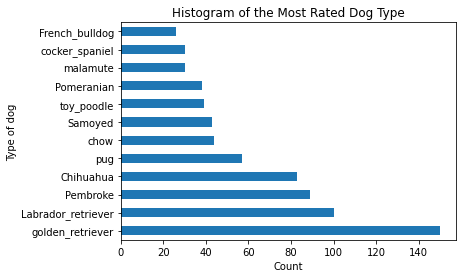

In [98]:
df_dog_type = twitter_archive_master.groupby('p1').filter(lambda x: len(x) >= 25)

df_dog_type['p1'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

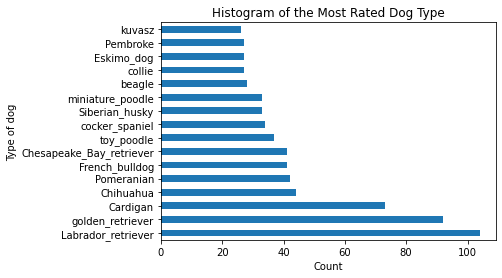

In [99]:
df_dog_type = twitter_archive_master.groupby('p2').filter(lambda x: len(x) >= 25)

df_dog_type['p2'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

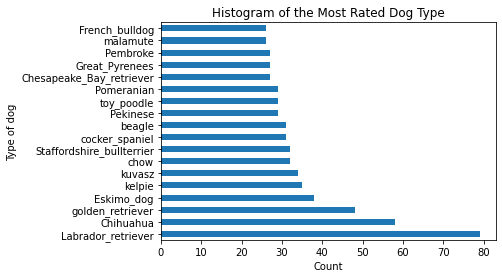

In [100]:
df_dog_type = twitter_archive_master.groupby('p3').filter(lambda x: len(x) >= 25)

df_dog_type['p3'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [101]:
twitter_archive_master['p1_conf'].mean()

0.5945482636144584

In [102]:
twitter_archive_master['p2_conf'].mean()

0.13458860950039173

In [103]:
twitter_archive_master['p3_conf'].mean()

0.060324168618106494

In [104]:
names = ['First Model', 'Second Model', 'Third Model']
conf = [int(twitter_archive_master['p1_conf'].mean()*100),
        int(twitter_archive_master['p2_conf'].mean()*100),
        int(twitter_archive_master['p3_conf'].mean()*100)]

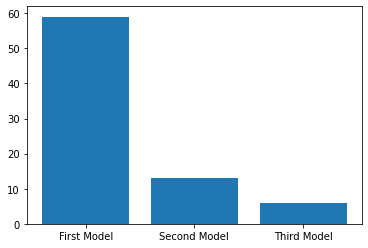

In [105]:
plt.bar(names, conf);

In [106]:
T= twitter_archive_master['p1_dog'].values[2]
dogs = twitter_archive_master[twitter_archive_master['p1_dog']==T]
df_dog_type_mean = dogs.groupby('p1').mean()[['rating_numerator', 'rating_denominator']]
df_dog_type_mean['Rate'] = df_dog_type_mean['rating_numerator'] / df_dog_type_mean['rating_denominator']
df_dog_type_mean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)
df_dog_type_mean

,Rate
p1,
Afghan_hound,1.050000
Airedale,0.983333
American_Staffordshire_terrier,1.100000
Appenzeller,1.100000
Australian_terrier,1.150000
...,...
toy_poodle,1.112821
toy_terrier,1.100000
vizsla,1.084615


In [107]:
df_dog_type_mean.sort_values(by='Rate',ascending=False, inplace=True)

In [108]:
df_dog_type_mean.head(10)

,Rate
p1,
Saluki,1.250000
Tibetan_mastiff,1.240000
briard,1.233333
Border_terrier,1.214286
giant_schnauzer,1.200000
silky_terrier,1.200000
standard_schnauzer,1.200000
Irish_setter,1.183333
Eskimo_dog,1.177778


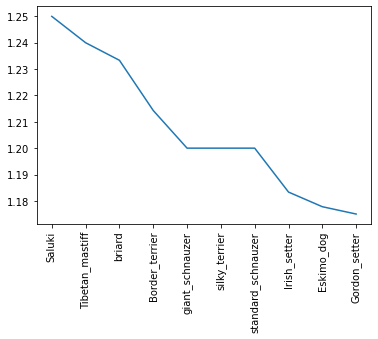

In [109]:
plt.plot(df_dog_type_mean.head(10))
plt.xticks(rotation=90);

In [110]:
df_dog_type_mean = dogs.groupby('p1').sum()[['retweet_count', 'favorite_count']]
df_dog_type_mean

,retweet_count,favorite_count
p1,,
Afghan_hound,15169.0,46200.0
Airedale,14232.0,56476.0
American_Staffordshire_terrier,19216.0,66637.0
Appenzeller,2441.0,13077.0
Australian_terrier,5293.0,19923.0
...,...,...
toy_poodle,75790.0,212234.0
toy_terrier,1974.0,8006.0
vizsla,22008.0,86874.0


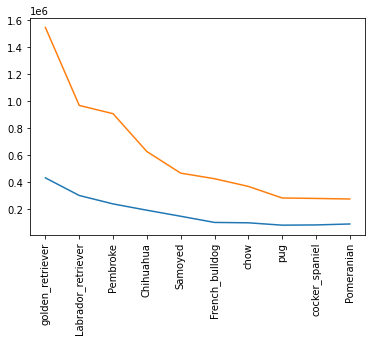

In [111]:
df_dog_type_mean.sort_values(by='favorite_count',ascending=False, inplace=True)
plt.plot(df_dog_type_mean.head(10))
plt.xticks(rotation=90);

In [112]:
df_dog_type_mean.head(10)

,retweet_count,favorite_count
p1,,
golden_retriever,433136.0,1544831.0
Labrador_retriever,303025.0,968820.0
Pembroke,240756.0,907619.0
Chihuahua,194176.0,627724.0
Samoyed,149539.0,468299.0
French_bulldog,103843.0,427046.0
chow,101113.0,370236.0
pug,83636.0,284614.0
cocker_spaniel,85346.0,281171.0


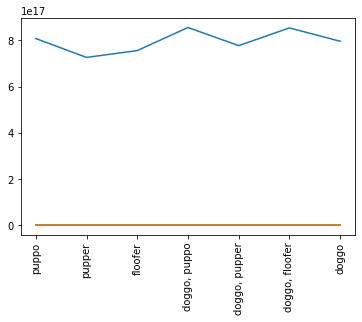

In [114]:
df_dog_type_mean = twitter_archive_master.groupby('dog_stage').mean()

df_dog_type_mean.sort_values(by='dog_stage',ascending=False, inplace=True)
plt.plot(df_dog_type_mean.head(10))
plt.xticks(rotation=90);